In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [212]:
services_dassistance_dans_les_gares_transilien = pd.read_excel("services-dassistance-dans-les-gares-transilien.xlsx")
equipements_daccessibilite_des_gares_du_reseau_transilien= pd.read_excel("equipements-daccessibilite-des-gares-du-reseau-transilien.xlsx")

# Informations sur l'accessibilité des gares du réseau transilien

In [213]:
equipements_daccessibilite_des_gares_du_reseau_transilien.head()

,code_uic,gare,guichet_adapte_pmr,boucle_magnetique,portes_automatiques_acces,bandes_eveil_vigilance,automates_transilien_accessibles,cab_passage_elargi_controle,ascenseurs,escaliers_mecaniques
0,87381491,ANDRESY,0.0,1.0,0.0,0.0,0.0,Pas de CAB,0.0,NaN
1,87758680,BAGNEUX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87393546,BIEVRES,0.0,1.0,0.0,0.0,0.0,Pas de CAB,0.0,NaN
3,87116731,COUILLY SAINT-GERMAIN QUINCY,0.0,1.0,0.0,0.0,0.0,Pas de CAB,0.0,NaN
4,87116772,CRECY LA CHAPELLE,0.0,1.0,0.0,0.0,0.0,Pas de CAB,0.0,NaN


In [214]:
equipements_daccessibilite_des_gares_du_reseau_transilien["guichet_adapte_pmr"] = equipements_daccessibilite_des_gares_du_reseau_transilien["guichet_adapte_pmr"].fillna(-1)
equipements_daccessibilite_des_gares_du_reseau_transilien["boucle_magnetique"] = equipements_daccessibilite_des_gares_du_reseau_transilien["boucle_magnetique"].fillna(-1)
equipements_daccessibilite_des_gares_du_reseau_transilien["portes_automatiques_acces"] = equipements_daccessibilite_des_gares_du_reseau_transilien["portes_automatiques_acces"].fillna(-1)
equipements_daccessibilite_des_gares_du_reseau_transilien["bandes_eveil_vigilance"] = equipements_daccessibilite_des_gares_du_reseau_transilien["bandes_eveil_vigilance"].fillna(-1)
equipements_daccessibilite_des_gares_du_reseau_transilien["automates_transilien_accessibles"] = equipements_daccessibilite_des_gares_du_reseau_transilien["automates_transilien_accessibles"].fillna(-1)
equipements_daccessibilite_des_gares_du_reseau_transilien["ascenseurs"] = equipements_daccessibilite_des_gares_du_reseau_transilien["ascenseurs"].fillna(-1)
equipements_daccessibilite_des_gares_du_reseau_transilien["escaliers_mecaniques"] = equipements_daccessibilite_des_gares_du_reseau_transilien["escaliers_mecaniques"].fillna(-1)

In [215]:
equipements_daccessibilite_des_gares_du_reseau_transilien.head()

,code_uic,gare,guichet_adapte_pmr,boucle_magnetique,portes_automatiques_acces,bandes_eveil_vigilance,automates_transilien_accessibles,cab_passage_elargi_controle,ascenseurs,escaliers_mecaniques
0,87381491,ANDRESY,0.0,1.0,0.0,0.0,0.0,Pas de CAB,0.0,-1.0
1,87758680,BAGNEUX,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,-1.0,-1.0
2,87393546,BIEVRES,0.0,1.0,0.0,0.0,0.0,Pas de CAB,0.0,-1.0
3,87116731,COUILLY SAINT-GERMAIN QUINCY,0.0,1.0,0.0,0.0,0.0,Pas de CAB,0.0,-1.0
4,87116772,CRECY LA CHAPELLE,0.0,1.0,0.0,0.0,0.0,Pas de CAB,0.0,-1.0


In [216]:
equipements_daccessibilite_des_gares_du_reseau_transilien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   code_uic                          508 non-null    int64  
 1   gare                              508 non-null    object 
 2   guichet_adapte_pmr                508 non-null    float64
 3   boucle_magnetique                 508 non-null    float64
 4   portes_automatiques_acces         508 non-null    float64
 5   bandes_eveil_vigilance            508 non-null    float64
 6   automates_transilien_accessibles  508 non-null    float64
 7   cab_passage_elargi_controle       376 non-null    object 
 8   ascenseurs                        508 non-null    float64
 9   escaliers_mecaniques              508 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 39.8+ KB


In [217]:
## Change les types de certaines colonnes float en int
equipements_daccessibilite_des_gares_du_reseau_transilien["guichet_adapte_pmr"] = equipements_daccessibilite_des_gares_du_reseau_transilien["guichet_adapte_pmr"].astype(int)
equipements_daccessibilite_des_gares_du_reseau_transilien["boucle_magnetique"] = equipements_daccessibilite_des_gares_du_reseau_transilien["boucle_magnetique"].astype(int)
equipements_daccessibilite_des_gares_du_reseau_transilien["portes_automatiques_acces"] = equipements_daccessibilite_des_gares_du_reseau_transilien["portes_automatiques_acces"].astype(int)
equipements_daccessibilite_des_gares_du_reseau_transilien["bandes_eveil_vigilance"] = equipements_daccessibilite_des_gares_du_reseau_transilien["bandes_eveil_vigilance"].astype(int)
equipements_daccessibilite_des_gares_du_reseau_transilien["automates_transilien_accessibles"] = equipements_daccessibilite_des_gares_du_reseau_transilien["automates_transilien_accessibles"].astype(int)
equipements_daccessibilite_des_gares_du_reseau_transilien["ascenseurs"] = equipements_daccessibilite_des_gares_du_reseau_transilien["ascenseurs"].astype(int)
equipements_daccessibilite_des_gares_du_reseau_transilien["escaliers_mecaniques"] = equipements_daccessibilite_des_gares_du_reseau_transilien["guichet_adapte_pmr"].astype(int)

In [218]:
equipements_daccessibilite_des_gares_du_reseau_transilien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   code_uic                          508 non-null    int64 
 1   gare                              508 non-null    object
 2   guichet_adapte_pmr                508 non-null    int64 
 3   boucle_magnetique                 508 non-null    int64 
 4   portes_automatiques_acces         508 non-null    int64 
 5   bandes_eveil_vigilance            508 non-null    int64 
 6   automates_transilien_accessibles  508 non-null    int64 
 7   cab_passage_elargi_controle       376 non-null    object
 8   ascenseurs                        508 non-null    int64 
 9   escaliers_mecaniques              508 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 39.8+ KB


In [219]:
equipements_daccessibilite_des_gares_du_reseau_transilien.head()

,code_uic,gare,guichet_adapte_pmr,boucle_magnetique,portes_automatiques_acces,bandes_eveil_vigilance,automates_transilien_accessibles,cab_passage_elargi_controle,ascenseurs,escaliers_mecaniques
0,87381491,ANDRESY,0,1,0,0,0,Pas de CAB,0,0
1,87758680,BAGNEUX,-1,-1,-1,-1,-1,NaN,-1,-1
2,87393546,BIEVRES,0,1,0,0,0,Pas de CAB,0,0
3,87116731,COUILLY SAINT-GERMAIN QUINCY,0,1,0,0,0,Pas de CAB,0,0
4,87116772,CRECY LA CHAPELLE,0,1,0,0,0,Pas de CAB,0,0


In [220]:
equipements_daccessibilite_des_gares_du_reseau_transilien["guichet_adapte_pmr"] = equipements_daccessibilite_des_gares_du_reseau_transilien["guichet_adapte_pmr"].replace(-1, "Aucune information")
equipements_daccessibilite_des_gares_du_reseau_transilien["guichet_adapte_pmr"] = equipements_daccessibilite_des_gares_du_reseau_transilien["guichet_adapte_pmr"].replace(0, "Pas disponible")
equipements_daccessibilite_des_gares_du_reseau_transilien["guichet_adapte_pmr"] = equipements_daccessibilite_des_gares_du_reseau_transilien["guichet_adapte_pmr"].replace(1, "Disponible")

equipements_daccessibilite_des_gares_du_reseau_transilien["boucle_magnetique"] = equipements_daccessibilite_des_gares_du_reseau_transilien["boucle_magnetique"].replace(-1, "Aucune information")
equipements_daccessibilite_des_gares_du_reseau_transilien["boucle_magnetique"] = equipements_daccessibilite_des_gares_du_reseau_transilien["boucle_magnetique"].replace(0, "Pas disponible")
equipements_daccessibilite_des_gares_du_reseau_transilien["boucle_magnetique"] = equipements_daccessibilite_des_gares_du_reseau_transilien["boucle_magnetique"].replace(1, "Disponible")

equipements_daccessibilite_des_gares_du_reseau_transilien["portes_automatiques_acces"] = equipements_daccessibilite_des_gares_du_reseau_transilien["portes_automatiques_acces"].replace(-1, "Aucune information")
equipements_daccessibilite_des_gares_du_reseau_transilien["portes_automatiques_acces"] = equipements_daccessibilite_des_gares_du_reseau_transilien["portes_automatiques_acces"].replace(0, "Pas disponible")
equipements_daccessibilite_des_gares_du_reseau_transilien["portes_automatiques_acces"] = equipements_daccessibilite_des_gares_du_reseau_transilien["portes_automatiques_acces"].replace(1, "Disponible")

equipements_daccessibilite_des_gares_du_reseau_transilien["ascenseurs"] = equipements_daccessibilite_des_gares_du_reseau_transilien["ascenseurs"].replace(-1, "Aucune information")
equipements_daccessibilite_des_gares_du_reseau_transilien["ascenseurs"] = equipements_daccessibilite_des_gares_du_reseau_transilien["ascenseurs"].replace(0, "Pas disponible")
equipements_daccessibilite_des_gares_du_reseau_transilien["ascenseurs"] = equipements_daccessibilite_des_gares_du_reseau_transilien["ascenseurs"].replace(1, "Disponible")

equipements_daccessibilite_des_gares_du_reseau_transilien["escaliers_mecaniques"] = equipements_daccessibilite_des_gares_du_reseau_transilien["escaliers_mecaniques"].replace(-1, "Aucune information")
equipements_daccessibilite_des_gares_du_reseau_transilien["escaliers_mecaniques"] = equipements_daccessibilite_des_gares_du_reseau_transilien["escaliers_mecaniques"].replace(0, "Pas disponible")
equipements_daccessibilite_des_gares_du_reseau_transilien["escaliers_mecaniques"] = equipements_daccessibilite_des_gares_du_reseau_transilien["escaliers_mecaniques"].replace(1, "Disponible")

In [221]:
equipements_daccessibilite_des_gares_du_reseau_transilien.head()

,code_uic,gare,guichet_adapte_pmr,boucle_magnetique,portes_automatiques_acces,bandes_eveil_vigilance,automates_transilien_accessibles,cab_passage_elargi_controle,ascenseurs,escaliers_mecaniques
0,87381491,ANDRESY,Pas disponible,Disponible,Pas disponible,0,0,Pas de CAB,Pas disponible,Pas disponible
1,87758680,BAGNEUX,Aucune information,Aucune information,Aucune information,-1,-1,NaN,Aucune information,Aucune information
2,87393546,BIEVRES,Pas disponible,Disponible,Pas disponible,0,0,Pas de CAB,Pas disponible,Pas disponible
3,87116731,COUILLY SAINT-GERMAIN QUINCY,Pas disponible,Disponible,Pas disponible,0,0,Pas de CAB,Pas disponible,Pas disponible
4,87116772,CRECY LA CHAPELLE,Pas disponible,Disponible,Pas disponible,0,0,Pas de CAB,Pas disponible,Pas disponible


## Accessibilité des guichets adapté au PMR

In [222]:
equipements_daccessibilite_des_gares_du_reseau_transilien["guichet_adapte_pmr"].value_counts()

guichet_adapte_pmr
Pas disponible        214
Disponible            153
Aucune information    141
Name: count, dtype: int64

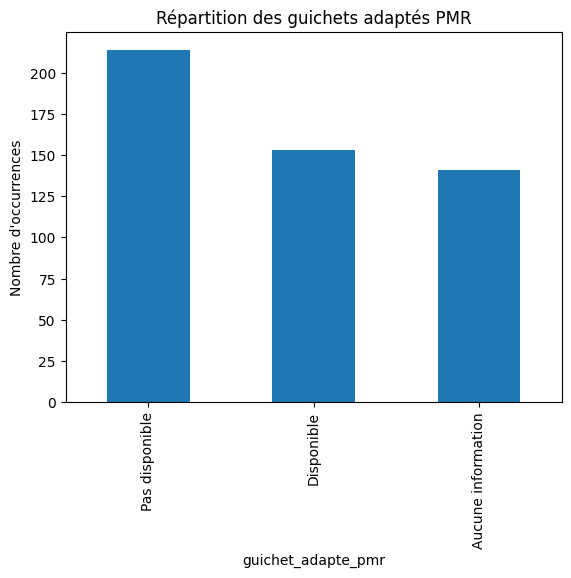

In [245]:
fig = plt.subplots

datas = equipements_daccessibilite_des_gares_du_reseau_transilien["guichet_adapte_pmr"].value_counts()
datas.plot(kind='bar')

plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des guichets adaptés PMR')

plt.show()

## Boucle magnétique

In [243]:
equipements_daccessibilite_des_gares_du_reseau_transilien["boucle_magnetique"].value_counts()

boucle_magnetique
Disponible            293
Aucune information    131
Pas disponible         84
Name: count, dtype: int64

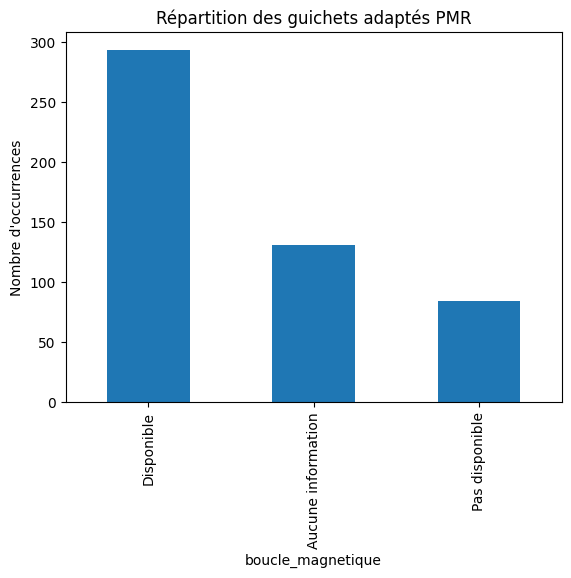

In [246]:
fig = plt.subplots

datas = equipements_daccessibilite_des_gares_du_reseau_transilien["boucle_magnetique"].value_counts()
datas.plot(kind='bar')

plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des guichets adaptés PMR')

plt.show()

## Accès aux portes automatiques

In [247]:
equipements_daccessibilite_des_gares_du_reseau_transilien["portes_automatiques_acces"].value_counts()

portes_automatiques_acces
Pas disponible        235
Disponible            143
Aucune information    130
Name: count, dtype: int64

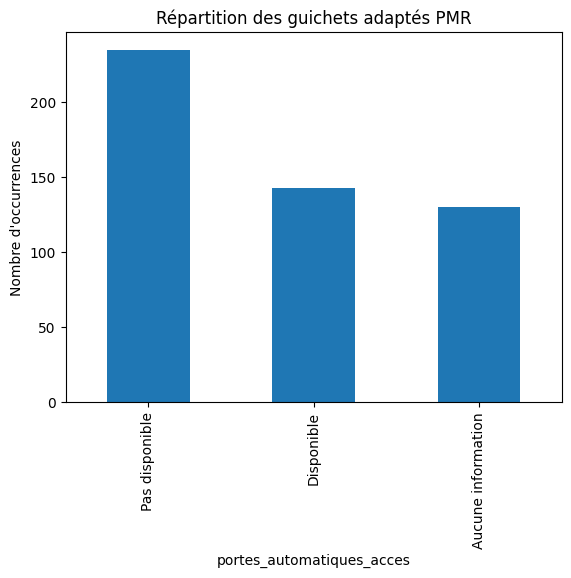

In [248]:
fig = plt.subplots

datas = equipements_daccessibilite_des_gares_du_reseau_transilien["portes_automatiques_acces"].value_counts()
datas.plot(kind='bar')

plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des guichets adaptés PMR')

plt.show()

In [255]:
equipements_daccessibilite_des_gares_du_reseau_transilien["ascenseurs"].value_counts().index

Index(['Pas disponible', 'Aucune information', 2, 3, 'Disponible', 4, 5, 7, 6,
       9],
      dtype='object', name='ascenseurs')

In [249]:
equipements_daccessibilite_des_gares_du_reseau_transilien["ascenseurs"].value_counts()

portes_automatiques_acces
Pas disponible        235
Disponible            143
Aucune information    130
Name: count, dtype: int64

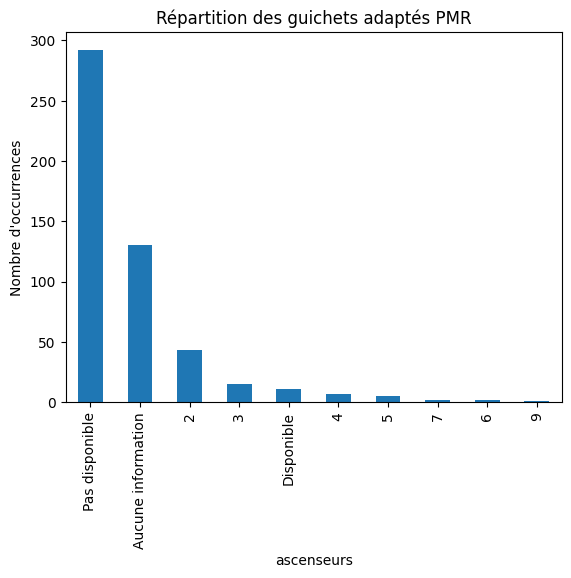

In [252]:
fig = plt.subplots

datas = equipements_daccessibilite_des_gares_du_reseau_transilien["ascenseurs"].value_counts()
datas.plot(kind='bar')

plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des guichets adaptés PMR')

plt.show()

## Escaliers mécaniques

In [253]:
equipements_daccessibilite_des_gares_du_reseau_transilien["escaliers_mecaniques"].value_counts()

escaliers_mecaniques
Pas disponible        214
Disponible            153
Aucune information    141
Name: count, dtype: int64

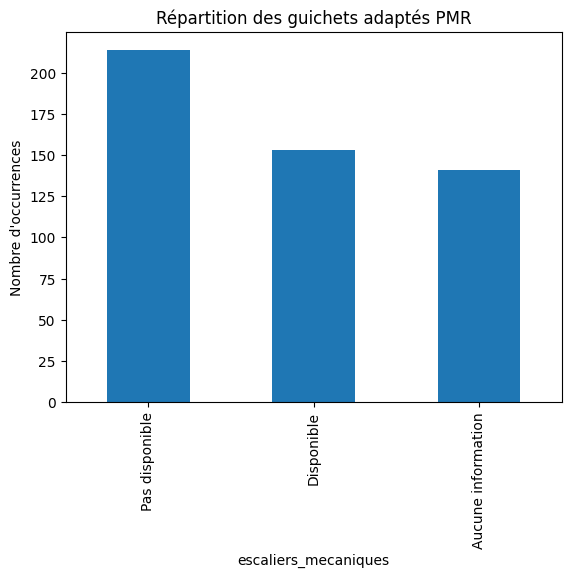

In [254]:
fig = plt.subplots

datas = equipements_daccessibilite_des_gares_du_reseau_transilien["escaliers_mecaniques"].value_counts()
datas.plot(kind='bar')

plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des guichets adaptés PMR')

plt.show()

# Informations service d'assistance dans les gares transilien

In [224]:
services_dassistance_dans_les_gares_transilien.columns

Index(['CODE_UIC', 'CODE UIC8', 'GARE', 'Ligne', 'Handicap Moteur',
       'Handicap Visuel', 'Handicap Auditif', 'Handicap Mental'],
      dtype='object')

In [225]:
services_dassistance_dans_les_gares_transilien.head(10)

,CODE_UIC,CODE UIC8,GARE,Ligne,Handicap Moteur,Handicap Visuel,Handicap Auditif,Handicap Mental
0,492108,87492108,ARDOINES (LES),LIGNE C,3,2,2,2
1,545475,87545475,EGLY,LIGNE C,3,3,3,3
2,393074,87393074,ISSY,LIGNE C,3,2,2,2
3,545301,87545301,IVRY-SUR-SEINE,LIGNE C,3,2,2,2
4,545186,87545186,MAROLLES-EN-HUREPOIX,LIGNE C,3,2,2,2
5,111278,87111278,PORTE DE CLICHY,LIGNE C,3,2,2,2
6,682278,87682278,MORET VENEUX LES SABLONS,LIGNE R,3,2,2,2
7,271163,87271163,PIERREFITTE STAINS,LIGNE D,3,2,2,2
8,281899,87281899,HAUSSMANN SAINT-LAZARE,LIGNE E,2,2,2,2
9,276394,87276394,ÉCOUEN ÉZANVILLE,LIGNE H,3,2,2,2


In [226]:
services_dassistance_dans_les_gares_transilien["Ligne"].unique()

array(['LIGNE C', 'LIGNE R', 'LIGNE D', 'LIGNE E', 'LIGNE H', 'LIGNE J',
       'LIGNE L', 'LIGNE K', 'LIGNE U', 'LIGNE B', 'LIGNE N', 'LIGNE P',
       'LIGNE A', 'LIGNE T4', 'LIGNE T11'], dtype=object)

In [227]:
services_dassistance_dans_les_gares_transilien

,CODE_UIC,CODE UIC8,GARE,Ligne,Handicap Moteur,Handicap Visuel,Handicap Auditif,Handicap Mental
0,492108,87492108,ARDOINES (LES),LIGNE C,3,2,2,2
1,545475,87545475,EGLY,LIGNE C,3,3,3,3
2,393074,87393074,ISSY,LIGNE C,3,2,2,2
3,545301,87545301,IVRY-SUR-SEINE,LIGNE C,3,2,2,2
4,545186,87545186,MAROLLES-EN-HUREPOIX,LIGNE C,3,2,2,2
...,...,...,...,...,...,...,...,...
467,393256,87393256,VERRIERE (LA),LIGNE N,3,2,2,2
468,697318,87697318,VILLETANEUSE UNIVERSITE,LIGNE T11,1,1,1,1
469,381715,87381715,MAREIL SUR MAULDRE,LIGNE N,3,3,3,3
470,391003,87391003,PARIS MONTPARNASSE,LIGNE N,2,2,2,2


In [228]:
services_dassistance_dans_les_gares_transilien.isnull().sum()

CODE_UIC            0
CODE UIC8           0
GARE                0
Ligne               0
Handicap Moteur     0
Handicap Visuel     0
Handicap Auditif    0
Handicap Mental     0
dtype: int64

In [229]:
services_dassistance_dans_les_gares_transilien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CODE_UIC          472 non-null    int64 
 1   CODE UIC8         472 non-null    int64 
 2   GARE              472 non-null    object
 3   Ligne             472 non-null    object
 4   Handicap Moteur   472 non-null    int64 
 5   Handicap Visuel   472 non-null    int64 
 6   Handicap Auditif  472 non-null    int64 
 7   Handicap Mental   472 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 29.6+ KB


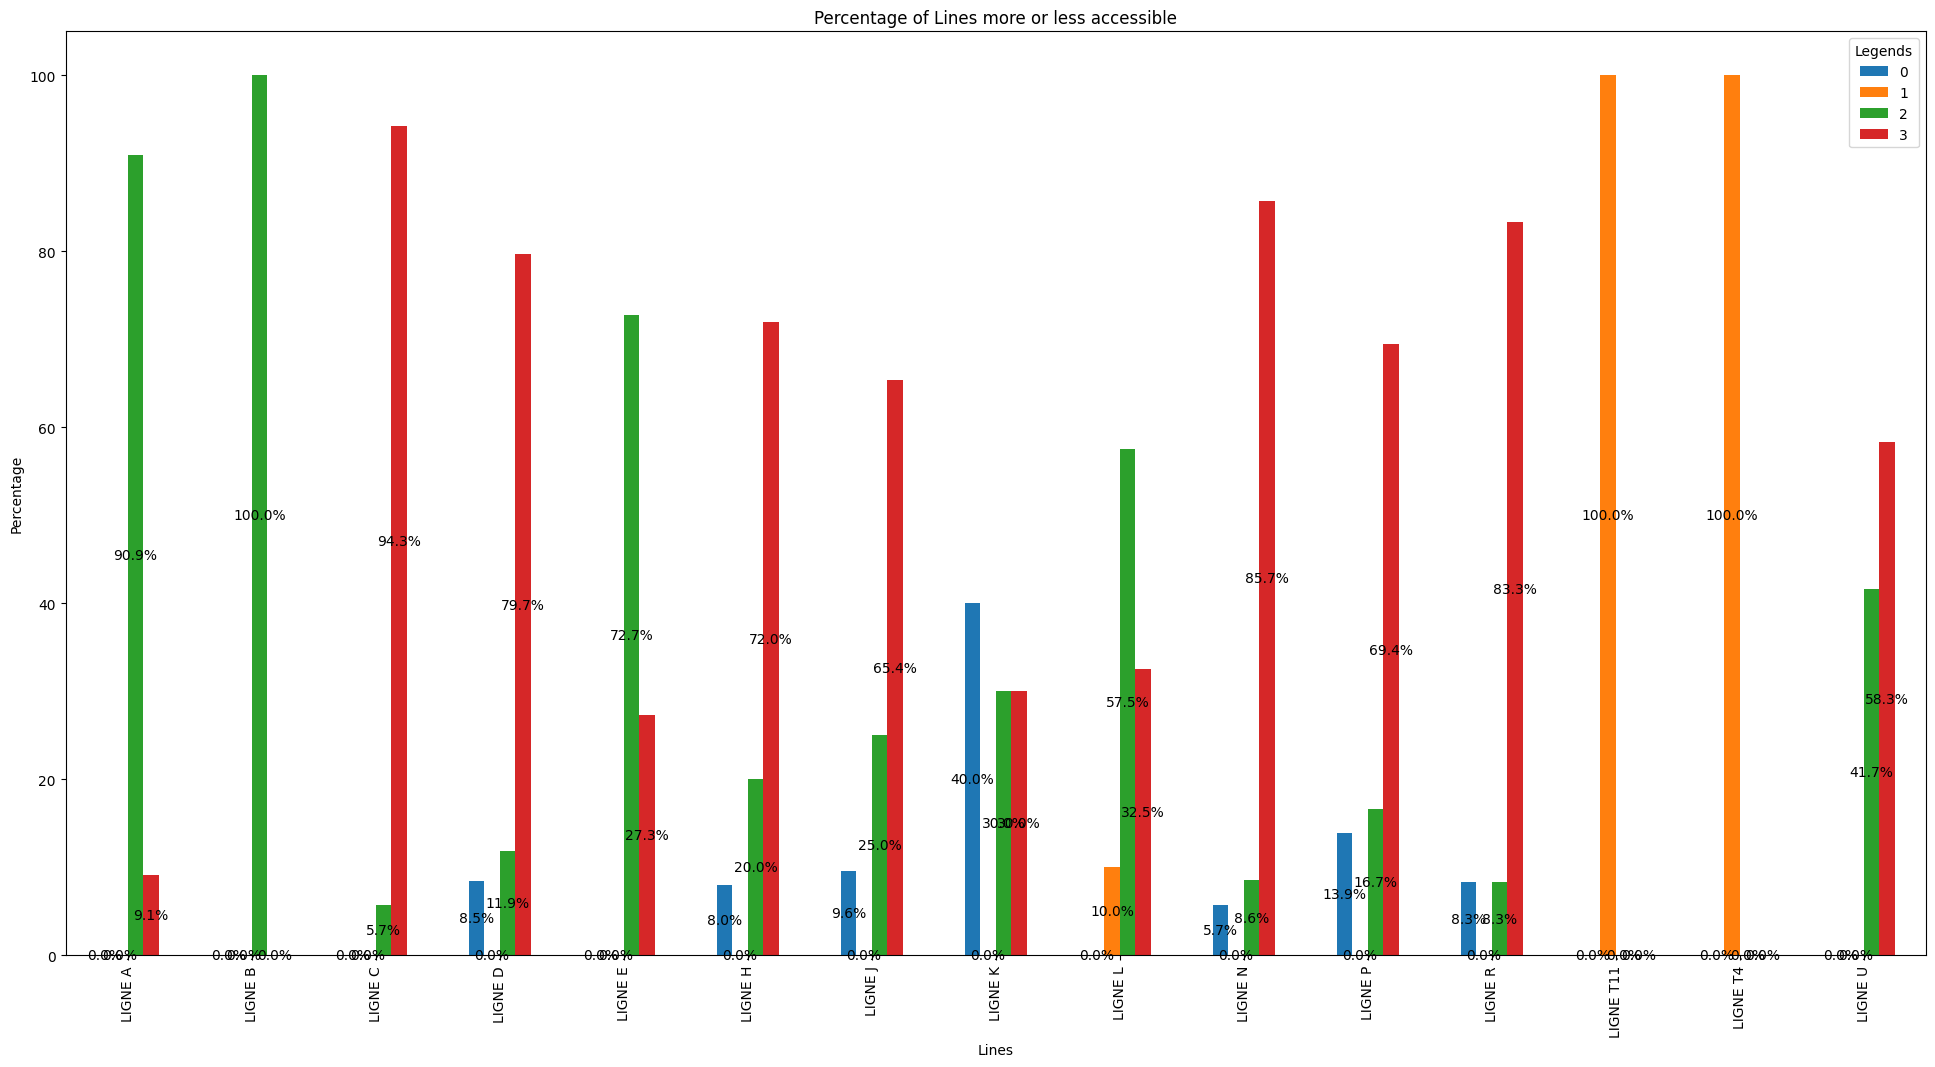

In [230]:
# assume 'df' is your pandas dataframe with the column of interest
column_name = 'Lines'  # replace with your column name
status_column = 'Legends'  # replace with your status column name
    
# create a pivot table to count the number of available and not available for each attribute
pivot_table = pd.pivot_table(services_dassistance_dans_les_gares_transilien, index=['Ligne'], columns=['Handicap Moteur'], aggfunc='size', fill_value=0)
    
# calculate the percentages for each attribute
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# create a bar chart
fig, ax = plt.subplots(figsize=(24, 12))
pivot_table_percentage.plot(kind='bar', ax=ax)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', horizontalalignment='center', verticalalignment='center')
    
    ax.set_title(f'Percentage of {column_name} more or less accessible')
    ax.set_xlabel(column_name)
    ax.set_ylabel('Percentage')
    ax.legend(title=status_column)
    
plt.show()

## Handicap Moteur

In [231]:
services_dassistance_dans_les_gares_transilien["Handicap Moteur"].value_counts()

Handicap Moteur
3    304
2    119
0     27
1     22
Name: count, dtype: int64

In [232]:
services_dassistance_dans_les_gares_transilien["Handicap Moteur"] = services_dassistance_dans_les_gares_transilien["Handicap Moteur"].replace(0, "Gare non accessible")
services_dassistance_dans_les_gares_transilien["Handicap Moteur"] = services_dassistance_dans_les_gares_transilien["Handicap Moteur"].replace(1, "Gare accessible en toute autonomie")
services_dassistance_dans_les_gares_transilien["Handicap Moteur"] = services_dassistance_dans_les_gares_transilien["Handicap Moteur"].replace(2, "Gare accessible avec l’aide d’un agent (service garanti sur réservation)")
services_dassistance_dans_les_gares_transilien["Handicap Moteur"] = services_dassistance_dans_les_gares_transilien["Handicap Moteur"].replace(3, "Gare non accessible mais un moyen de substitution est disponible \n (service de transport routier de substitution sur réservation qui amène le voyageur à la gare \n accessible la plus proche ou report sur le réseau bus RATP accessible)")

([<matplotlib.patches.Wedge at 0x228adbe6110>,
 [Text(-0.4810382681062721, 0.9892432383480406, 'Gare non accessible mais un moyen de substitution est disponible \n (service de transport routier de substitution sur réservation qui amène le voyageur à la gare \n accessible la plus proche ou report sur le réseau bus RATP accessible)'),
  Text(0.1387387467053752, -1.0912156341267394, 'Gare accessible avec l’aide d’un agent (service garanti sur réservation)'),
  Text(0.9794416864483746, -0.5006935019022757, 'Gare non accessible'),
  Text(1.0882281226173716, -0.16049782909644295, 'Gare accessible en toute autonomie')],
 [Text(-0.2623845098761484, 0.539587220917113, '64.4%'),
  Text(0.07567568002111374, -0.5952085277054942, '25.2%'),
  Text(0.5342409198809315, -0.2731055464921503, '5.7%'),
  Text(0.5935789759731117, -0.08754427041624159, '4.7%')])

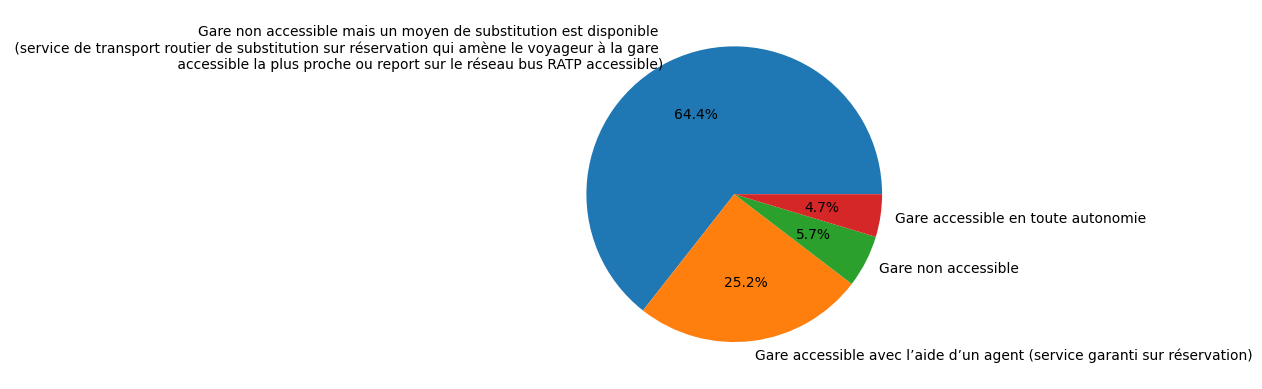

In [233]:
plt.pie(services_dassistance_dans_les_gares_transilien["Handicap Moteur"].value_counts(), labels=services_dassistance_dans_les_gares_transilien["Handicap Moteur"].value_counts().index, autopct="%1.1f%%")

## Handicap Visuel

In [234]:
services_dassistance_dans_les_gares_transilien["Handicap Visuel"].value_counts()

Handicap Visuel
2    330
3    104
1     22
0     16
Name: count, dtype: int64

In [235]:
services_dassistance_dans_les_gares_transilien["Handicap Visuel"] = services_dassistance_dans_les_gares_transilien["Handicap Visuel"].replace(0, "Gare non accessible")
services_dassistance_dans_les_gares_transilien["Handicap Visuel"] = services_dassistance_dans_les_gares_transilien["Handicap Visuel"].replace(1, "Gare accessible en toute autonomie")
services_dassistance_dans_les_gares_transilien["Handicap Visuel"] = services_dassistance_dans_les_gares_transilien["Handicap Visuel"].replace(2, "Gare accessible avec l’aide d’un agent (service garanti sur réservation)")
services_dassistance_dans_les_gares_transilien["Handicap Visuel"] = services_dassistance_dans_les_gares_transilien["Handicap Visuel"].replace(3, "Gare non accessible mais un moyen de substitution est disponible")

([<matplotlib.patches.Wedge at 0x228aded87c0>,
 [Text(-0.6441923120288771, 0.8916368459876981, 'Gare accessible avec l’aide d’un agent (service garanti sur réservation)'),
  Text(0.4005765190049021, -1.0244698396838805, 'Gare non accessible mais un moyen de substitution est disponible'),
  Text(1.029711220083724, -0.38690412666924223, 'Gare accessible en toute autonomie'),
  Text(1.0937682729239966, -0.11692290256770854, 'Gare non accessible')],
 [Text(-0.3513776247430238, 0.4863473705387444, '69.9%'),
  Text(0.21849628309358293, -0.558801730736662, '22.0%'),
  Text(0.561660665500213, -0.21103861454685938, '4.7%'),
  Text(0.5966008761403617, -0.06377612867329556, '3.4%')])

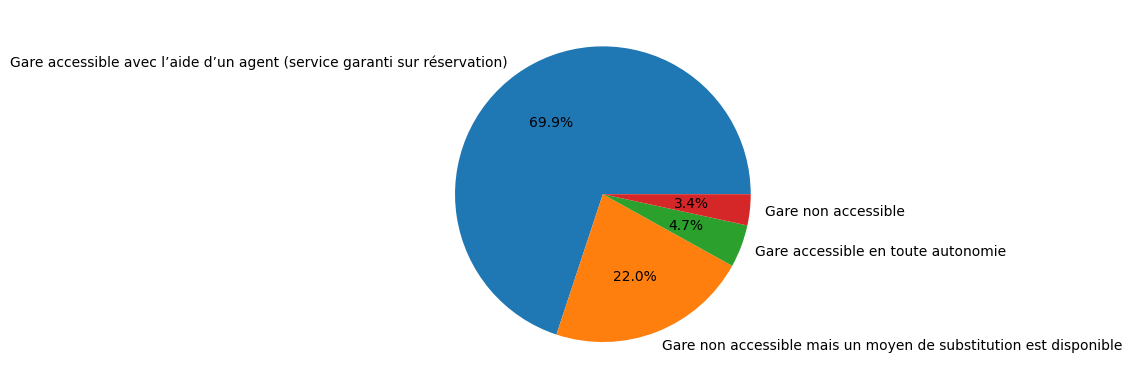

In [236]:
plt.pie(services_dassistance_dans_les_gares_transilien["Handicap Visuel"].value_counts(), labels=services_dassistance_dans_les_gares_transilien["Handicap Visuel"].value_counts().index, autopct="%1.1f%%")

## Handicap Auditif

In [237]:
services_dassistance_dans_les_gares_transilien["Handicap Auditif"].value_counts()

Handicap Auditif
2    330
3    104
1     22
0     16
Name: count, dtype: int64

In [238]:
services_dassistance_dans_les_gares_transilien["Handicap Auditif"] = services_dassistance_dans_les_gares_transilien["Handicap Auditif"].replace(0, "Gare non accessible")
services_dassistance_dans_les_gares_transilien["Handicap Auditif"] = services_dassistance_dans_les_gares_transilien["Handicap Auditif"].replace(1, "Gare accessible en toute autonomie")
services_dassistance_dans_les_gares_transilien["Handicap Auditif"] = services_dassistance_dans_les_gares_transilien["Handicap Auditif"].replace(2, "Gare accessible avec l’aide d’un agent (service garanti sur réservation)")
services_dassistance_dans_les_gares_transilien["Handicap Auditif"] = services_dassistance_dans_les_gares_transilien["Handicap Auditif"].replace(3, "Gare non accessible mais un moyen de substitution est disponible")

([<matplotlib.patches.Wedge at 0x228adf24700>,
 [Text(-0.6441923120288771, 0.8916368459876981, 'Gare accessible avec l’aide d’un agent (service garanti sur réservation)'),
  Text(0.4005765190049021, -1.0244698396838805, 'Gare non accessible mais un moyen de substitution est disponible'),
  Text(1.029711220083724, -0.38690412666924223, 'Gare accessible en toute autonomie'),
  Text(1.0937682729239966, -0.11692290256770854, 'Gare non accessible')],
 [Text(-0.3513776247430238, 0.4863473705387444, '69.9%'),
  Text(0.21849628309358293, -0.558801730736662, '22.0%'),
  Text(0.561660665500213, -0.21103861454685938, '4.7%'),
  Text(0.5966008761403617, -0.06377612867329556, '3.4%')])

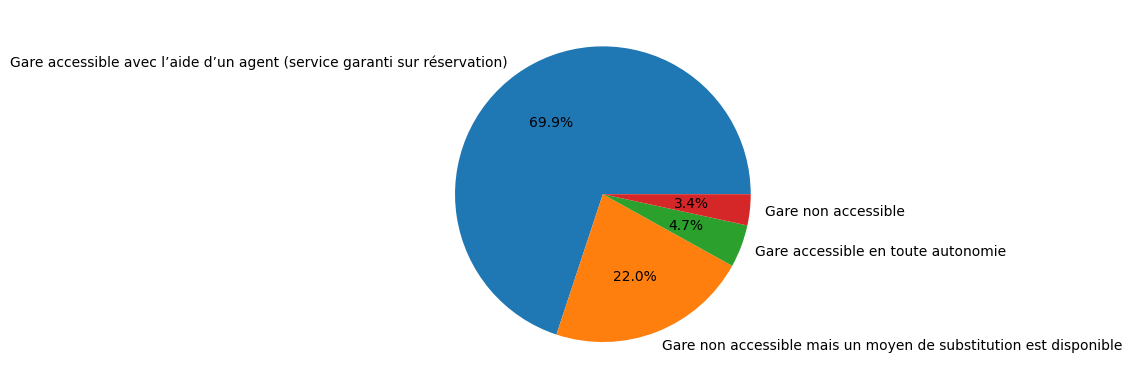

In [239]:
plt.pie(services_dassistance_dans_les_gares_transilien["Handicap Auditif"].value_counts(), labels=services_dassistance_dans_les_gares_transilien["Handicap Auditif"].value_counts().index, autopct="%1.1f%%")

## Handicap Mental

In [240]:
services_dassistance_dans_les_gares_transilien["Handicap Mental"].value_counts()

Handicap Mental
2    330
3    104
1     22
0     16
Name: count, dtype: int64

In [241]:
services_dassistance_dans_les_gares_transilien["Handicap Mental"] = services_dassistance_dans_les_gares_transilien["Handicap Mental"].replace(0, "Gare non accessible")
services_dassistance_dans_les_gares_transilien["Handicap Mental"] = services_dassistance_dans_les_gares_transilien["Handicap Mental"].replace(1, "Gare accessible en toute autonomie")
services_dassistance_dans_les_gares_transilien["Handicap Mental"] = services_dassistance_dans_les_gares_transilien["Handicap Mental"].replace(2, "Gare accessible avec l’aide d’un agent (service garanti sur réservation)")
services_dassistance_dans_les_gares_transilien["Handicap Mental"] = services_dassistance_dans_les_gares_transilien["Handicap Mental"].replace(3, "Gare non accessible mais un moyen de substitution est disponible")

([<matplotlib.patches.Wedge at 0x228adf4ffd0>,
 [Text(-0.6441923120288771, 0.8916368459876981, 'Gare accessible avec l’aide d’un agent (service garanti sur réservation)'),
  Text(0.4005765190049021, -1.0244698396838805, 'Gare non accessible mais un moyen de substitution est disponible'),
  Text(1.029711220083724, -0.38690412666924223, 'Gare accessible en toute autonomie'),
  Text(1.0937682729239966, -0.11692290256770854, 'Gare non accessible')],
 [Text(-0.3513776247430238, 0.4863473705387444, '69.9%'),
  Text(0.21849628309358293, -0.558801730736662, '22.0%'),
  Text(0.561660665500213, -0.21103861454685938, '4.7%'),
  Text(0.5966008761403617, -0.06377612867329556, '3.4%')])

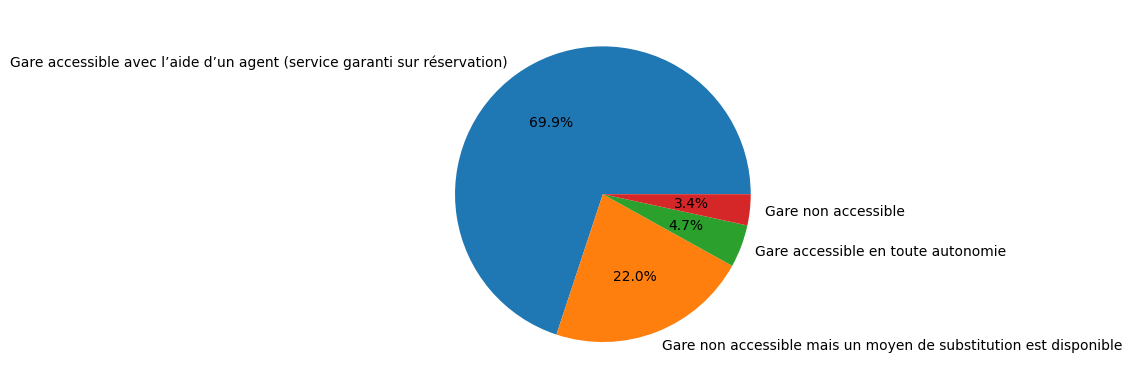

In [242]:
plt.pie(services_dassistance_dans_les_gares_transilien["Handicap Mental"].value_counts(), labels=services_dassistance_dans_les_gares_transilien["Handicap Mental"].value_counts().index, autopct="%1.1f%%")